# Diabetes Prediction using KNN

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [85]:
data = pd.read_csv("diabetes.csv")

In [86]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# check Null values

In [87]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# check duplicate values

In [88]:
data.duplicated().sum()

0

In [89]:
data['Outcome'].value_counts()

0    499
1    268
Name: Outcome, dtype: int64

# find correlation

<AxesSubplot:>

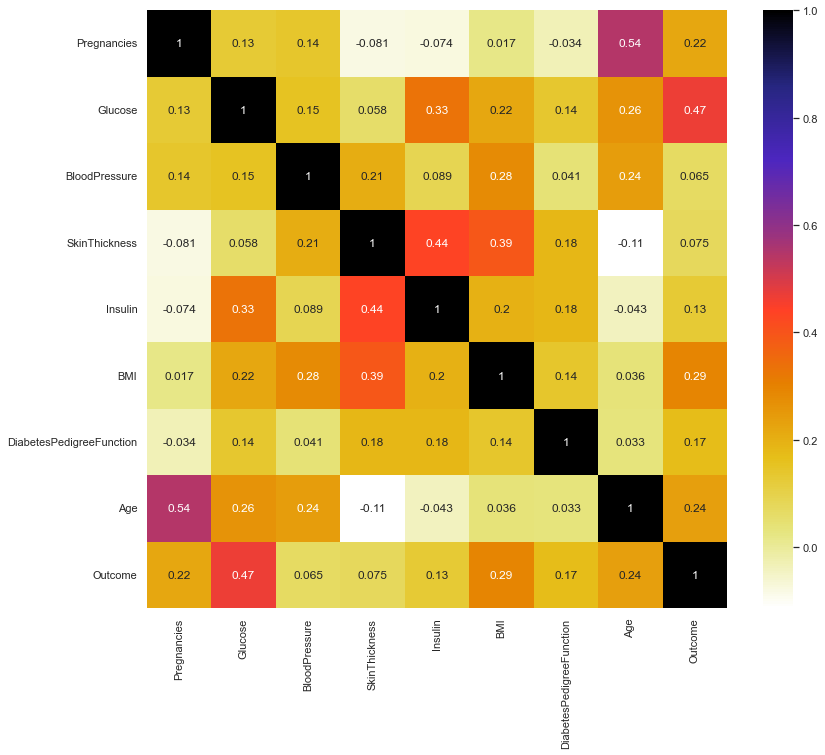

In [90]:
plt.figure(figsize=(13,11))
cor=data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)

In [91]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# convert data into dependent and independent variables

In [92]:
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

# split the data into train and test

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# apply standard scalar

In [94]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit the model

In [95]:
n_set = range(1, 21)
training_accuracy=[]
test_accuracy=[]

for n in n_set:
    classifier=KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train,y_train)
    training_accuracy.append(classifier.score(X_train,y_train))
    test_accuracy.append(classifier.score(X_test,y_test))

In [96]:
test_accuracy

[0.7142857142857143,
 0.7186147186147186,
 0.7272727272727273,
 0.7619047619047619,
 0.7705627705627706,
 0.7575757575757576,
 0.7445887445887446,
 0.7662337662337663,
 0.7705627705627706,
 0.7575757575757576,
 0.7662337662337663,
 0.7532467532467533,
 0.7792207792207793,
 0.7619047619047619,
 0.7705627705627706,
 0.7662337662337663,
 0.7575757575757576,
 0.7662337662337663,
 0.7619047619047619,
 0.7489177489177489]

In [97]:
training_accuracy

[1.0,
 0.8283582089552238,
 0.8451492537313433,
 0.8059701492537313,
 0.7947761194029851,
 0.7723880597014925,
 0.7798507462686567,
 0.7798507462686567,
 0.7798507462686567,
 0.7742537313432836,
 0.7873134328358209,
 0.7649253731343284,
 0.7705223880597015,
 0.7649253731343284,
 0.7742537313432836,
 0.7779850746268657,
 0.7779850746268657,
 0.7705223880597015,
 0.7817164179104478,
 0.7723880597014925]

# predict the value

In [98]:
y_pred = classifier.predict(X_test)

In [99]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
165    1
188    1
334    0
758    0
34     0
Name: Outcome, Length: 231, dtype: int64

In [100]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# test and train accuracy

C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruby Computer\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


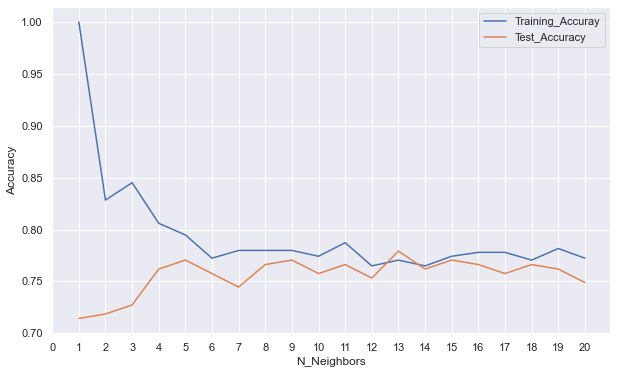

In [101]:
plt.figure(figsize=(10,6))
sns.set(style="darkgrid",context="notebook")
ax=sns.lineplot(range(1,21),training_accuracy,label='Training_Accuray') 
ax=sns.lineplot(range(1,21),test_accuracy,label='Test_Accuracy')
ax.set(xlabel ="N_Neighbors", ylabel = "Accuracy")
plt.xticks(range(0,21,1))
plt.show()

# compare predicted and actual values

In [102]:
comparison = pd.DataFrame({'Predicted Values':y_pred,'Actual Values':y_test})

In [103]:
comparison

,Predicted Values,Actual Values
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
165,0,1
188,0,1
334,0,0
758,0,0


# Compare test and training accuracy for different values of K

In [104]:
comparison_accuracy = pd.DataFrame({'K avlues':n_set,'Training Accuracy':training_accuracy,'Test Accuracy':test_accuracy})
comparison_accuracy

,K avlues,Training Accuracy,Test Accuracy
0,1,1.000000,0.714286
1,2,0.828358,0.718615
2,3,0.845149,0.727273
3,4,0.805970,0.761905
4,5,0.794776,0.770563
5,6,0.772388,0.757576
6,7,0.779851,0.744589
7,8,0.779851,0.766234
8,9,0.779851,0.770563
9,10,0.774254,0.757576


# confusion matrix

In [105]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,  14],
       [ 44,  30]], dtype=int64)

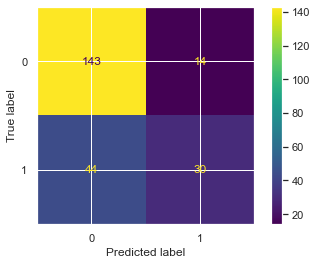

In [106]:
plot_confusion_matrix(classifier,X_test,y_test)